# Colab 연습

In [2]:
!cat /etc/issue.net

Ubuntu 18.04.5 LTS


In [3]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0


In [4]:
!head -n 3 /proc/meminfo # MemFree: 10GB

MemTotal:       13333596 kB
MemFree:        10886224 kB
MemAvailable:   12539464 kB


In [5]:
# GPU info
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [6]:
# 현재 작업중인 디렉토리
!pwd

/content


In [8]:
# 디렉토리 이름 출력
!ls

sample_data


In [7]:
# 디렉토리의 상세정보 출력
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Feb  4 15:26 sample_data


In [9]:
!ls -l sample_data

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Feb  4 15:26 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Feb  4 15:26 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Feb  4 15:26 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Feb  4 15:26 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [10]:
# 파일 내용 출력
!cat sample_data/README.md

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


In [11]:
# 파이썬 버전 출력
# 파이썬 버전 3.6+ 에서는 f-string 문법이 가능하다.
!python --version

Python 3.6.9


In [12]:
# 텐서플로우 버전 출력
import tensorflow as tf
tf.__version__

'2.4.1'

In [13]:
# 케라스 버전 출력
from tensorflow import keras
keras.__version__

'2.4.0'

In [14]:
print('한글')

한글


In [5]:
!hostname

d891366f4cf9


In [15]:
# 나눔폰트 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,906 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146442 files and d

In [2]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data

array([  -49,  -237,  -325,  -482,  -596,  -628,  -674,  -648,  -806,
        -801,  -805,  -887,  -941, -1036, -1098, -1248, -1252, -1206,
       -1305, -1369, -1524, -1644, -1794, -1965, -1929, -2049, -2040,
       -2233, -2136, -2250, -2222, -2315, -2317, -2267, -2436, -2567,
       -2553, -2729, -2652, -2655, -2653, -2763, -2953, -3059, -3138,
       -3040, -3017, -2945, -2925, -3096])

## MNIST 손글씨 분류

### 1. Machine Learning (SVM)

In [4]:
import numpy as np
import pandas as pd

mnist = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist.shape

(20000, 785)

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    mnist.iloc[:, 1:], mnist.iloc[:, 0], test_size=0.25, stratify=mnist.iloc[:,0], random_state=2021
)
X_train.shape, X_test.shape

((15000, 784), (5000, 784))

In [10]:
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

In [11]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
# 머신러닝 코드는 GPU를 사용하지 않는다.
pred = sv_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9714

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

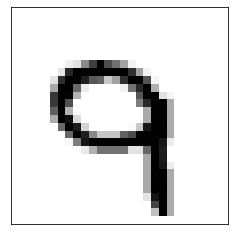

In [14]:
digit = X_test.iloc[1000, :].values.reshape(28,28)
plt.figure(figsize=(4,4))
plt.xticks([])
plt.yticks([])
plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest')
plt.show()

### 2. Deep Learning



In [15]:
# Add Layer
from tensorflow.keras.models import Sequential
# Dense: Fully Connected Network
from tensorflow.keras.layers import Dense

In [16]:
# One-hot Encoding: 1 이 하나만 나머진 0 으로 바꿔주는것
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((15000, 10), (5000, 10))

In [18]:
# 784 -> 512 -> 100 -> 10
# input -> hidden -> hidden -> output
# Model 생성
model = Sequential()

# Hidden Layer - input 784개의 데이터를 512 개의 Node(Fully Connected Network)를 생성
model.add(Dense(512, input_shape=(784,), activation='relu'))

# Hidden Layer - 100 개의 Node(Fully Connected Network)를 생성
model.add(Dense(100, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 모델 실행 환결 설정

# loss 함수 (경사하강법)
# - 다중분류: categorical_crossentropy
# - 이진분류: binoary_crossentropy
# - 회귀분석: rms, rootminscailer

# optimizer
# adam: 다차원의 그래프에서 최적화된 loss 함수를 찾기위한 방법

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [20]:
# 모델 실행
model.fit(
    X_train, Y_train, 
    validation_split=0.2, 
    # 훈련을 총 몇번 반복할 것인가
    epochs=20, 
    # 한번에 몇개의 데이터를 가지고 올것인가
    # 너무 크면 갱신하는 주기가 커서 오버피팅 될 가능성이 있음
    # 메모리에 영향을 받음
    batch_size=200
)

Epoch 1/20
60/60 [==============================] - 2s 19ms/step - loss: 1.0306 - accuracy: 0.7085 - val_loss: 0.3085 - val_accuracy: 0.9033
Epoch 2/20
60/60 [==============================] - 1s 15ms/step - loss: 0.2515 - accuracy: 0.9254 - val_loss: 0.2269 - val_accuracy: 0.9317
Epoch 3/20
60/60 [==============================] - 1s 14ms/step - loss: 0.1798 - accuracy: 0.9479 - val_loss: 0.1946 - val_accuracy: 0.9443
Epoch 4/20
60/60 [==============================] - 1s 14ms/step - loss: 0.1289 - accuracy: 0.9649 - val_loss: 0.1830 - val_accuracy: 0.9460
Epoch 5/20
60/60 [==============================] - 1s 14ms/step - loss: 0.0866 - accuracy: 0.9780 - val_loss: 0.1691 - val_accuracy: 0.9500
Epoch 6/20
60/60 [==============================] - 1s 14ms/step - loss: 0.0699 - accuracy: 0.9833 - val_loss: 0.1620 - val_accuracy: 0.9517
Epoch 7/20
60/60 [==============================] - 1s 14ms/step - loss: 0.0522 - accuracy: 0.9864 - val_loss: 0.1625 - val_accuracy: 0.9540
Epoch 8/20
60

In [21]:
model.evaluate(X_test, Y_test)

157/157 [==============================] - 1s 3ms/step - loss: 0.1223 - accuracy: 0.9678


[0.12228057533502579, 0.9678000211715698]

In [22]:
acc = model.evaluate(X_test, Y_test)[1]
print(f'Accuracy = {acc:.4f}')

157/157 [==============================] - 1s 3ms/step - loss: 0.1223 - accuracy: 0.9678
Accuracy = 0.9678
